In [4489]:
import numpy as np

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [4490]:
# tickers_list = ['^NSEI']
tickers_list = ['bayercrop.NS']


data = yf.download(tickers_list,'2020-1-1')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,3574.949951,3635.000000,3574.949951,3618.100098,3329.429199,2603
2020-01-02,3614.300049,3649.000000,3591.000000,3639.050049,3348.707275,20305
2020-01-03,3632.000000,3790.949951,3624.149902,3743.550049,3444.870117,64408
2020-01-06,3745.000000,3745.050049,3640.000000,3662.149902,3369.964355,23972
2020-01-07,3648.850098,3733.000000,3648.850098,3679.600098,3386.021973,22215
...,...,...,...,...,...,...
2023-11-06,5220.000000,5394.799805,5220.000000,5242.899902,5242.899902,121788
2023-11-07,5250.000000,5440.000000,5245.000000,5353.450195,5353.450195,42613
2023-11-08,5355.000000,5538.000000,5355.000000,5408.850098,5408.850098,53598


In [4491]:
data['Close'].to_list()

[3618.10009765625,
 3639.050048828125,
 3743.550048828125,
 3662.14990234375,
 3679.60009765625,
 3764.35009765625,
 3798.0,
 3869.14990234375,
 3884.10009765625,
 3926.800048828125,
 3980.39990234375,
 4084.89990234375,
 4184.64990234375,
 4139.60009765625,
 4174.5,
 4102.35009765625,
 4088.550048828125,
 4134.35009765625,
 4147.5498046875,
 4081.800048828125,
 4122.2001953125,
 4131.60009765625,
 4130.10009765625,
 4255.25,
 4441.64990234375,
 4445.35009765625,
 4499.85009765625,
 4498.9501953125,
 4504.9501953125,
 4457.4501953125,
 4429.14990234375,
 4352.64990234375,
 4357.0498046875,
 4254.89990234375,
 4257.5498046875,
 4273.10009765625,
 4259.39990234375,
 4467.0,
 4500.2001953125,
 4457.7001953125,
 4324.9501953125,
 4382.0498046875,
 4338.14990234375,
 4366.4501953125,
 4346.9501953125,
 4361.5,
 4235.5498046875,
 4228.0498046875,
 4194.89990234375,
 4110.9501953125,
 4234.10009765625,
 4001.199951171875,
 3877.85009765625,
 3747.800048828125,
 3561.85009765625,
 3494.5500488

In [4492]:
def get_coordinate(num):
    # return num * np.cos(num), num * np.sin(num)
    return num * np.cos(num), num * np.sin(num)


In [4493]:
def create_plot(nums, figsize=8, s=None, show_annot=False):
    o1 = 100
    o2 = 250
    nums = np.array(list(nums))
    x, y = get_coordinate(nums)
    plt.figure(figsize=(figsize, figsize))
    plt.axis("off")
    plt.scatter(x[:-o2], y[:-o2], s=s, c='green')
    plt.scatter(x[-o2:-o1], y[-o2:-o1], s=s, c='red')
    plt.scatter(x[-o1:], y[-o1:], s=s, c='orange')
    # plt.scatter(x, y, s=s, c='red')

    return plt


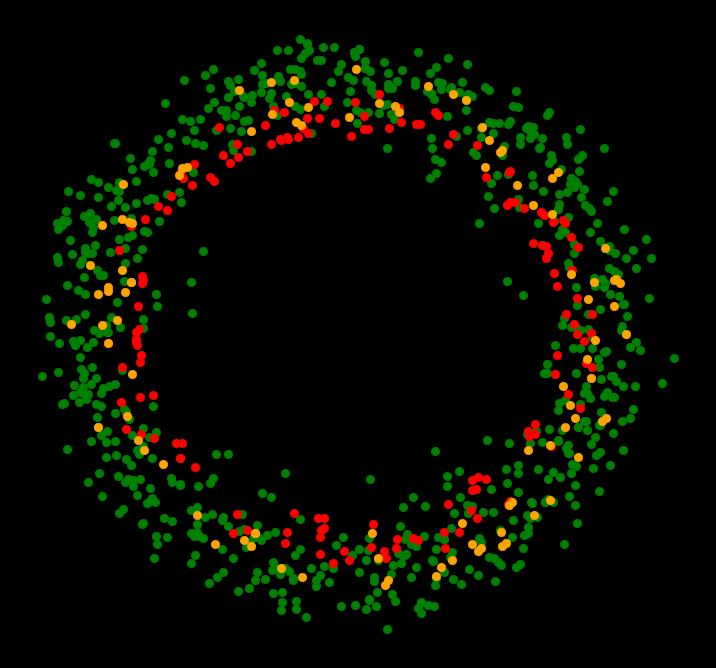

In [4494]:
nums = data['Close'].to_list()
# nums = range(100)

plt = create_plot(nums)
plt.show()


<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

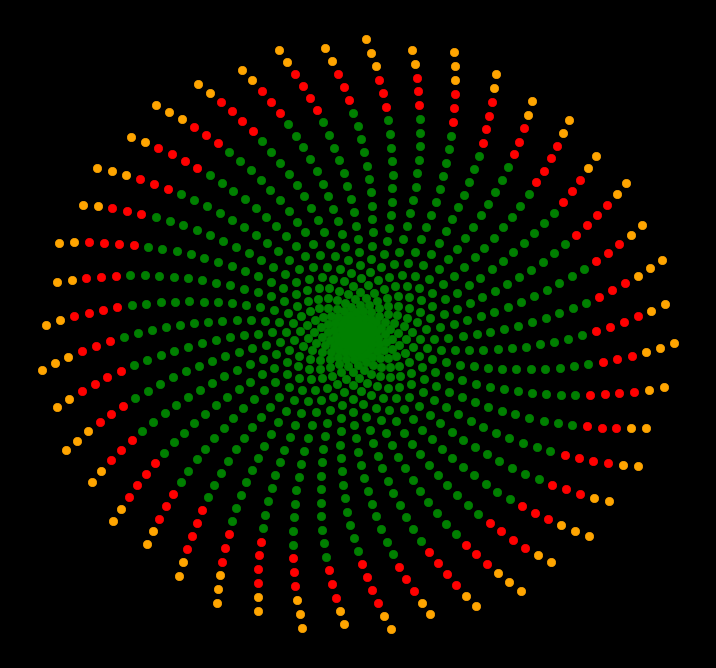

In [4495]:
nums = range(1000)
get_coordinate(nums)

create_plot(nums)

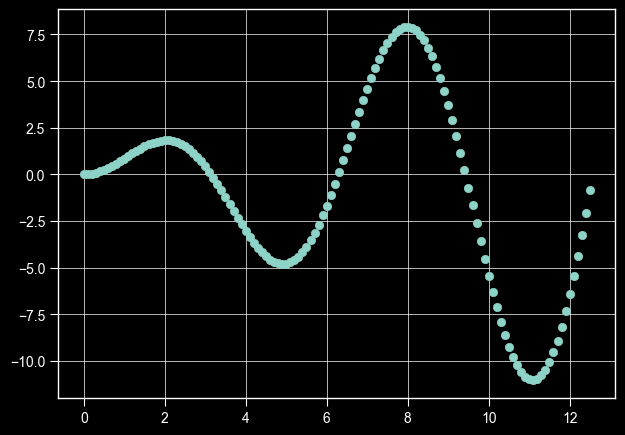

In [4496]:

x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = x * np.sin(x)

plt.scatter(x,y)
plt.show()

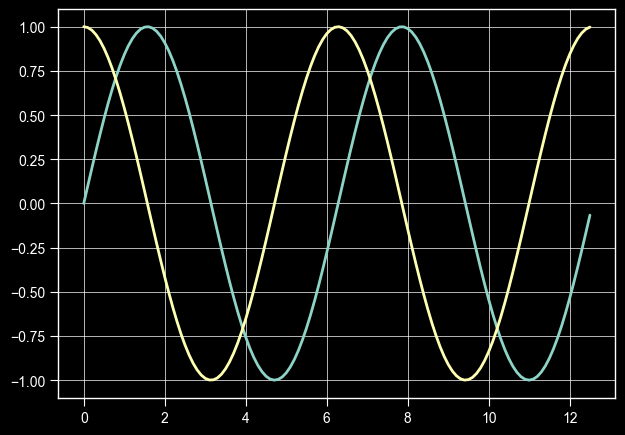

In [4497]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y,x,z)
plt.show()

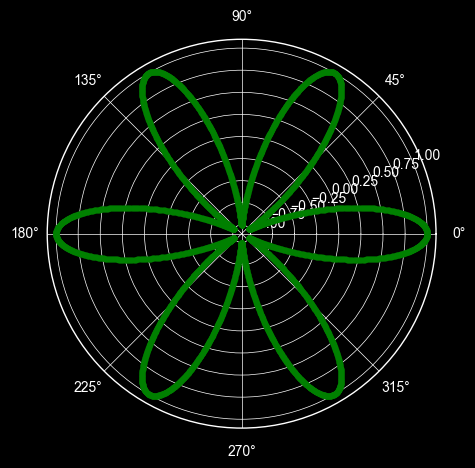

In [4498]:
# setting the axes 
# projection as polar 
plt.axes(projection='polar') 
  
# setting the length 
# and number of petals 
a = 1
n = 6
  
# creating an array 
# containing the radian values 
rads = np.arange(0, 2 * np.pi, 0.001)  
  
# plotting the rose 
for rad in rads: 
    r = a * np.cos(n*rad) 
    plt.polar(rad, r, 'g.') 
   
# display the polar plot 
plt.show() 

In [4499]:
merge = data.copy()
merge.reset_index(inplace=True)
merge = merge.set_index("Date")

idx = pd.date_range(merge.index.min().replace(month=1, day=1), merge.index.max().to_period('Y').to_timestamp('Y'))
df = merge.reindex(idx, method='ffill')
df = df[df.index.weekday < 5]
df.index.name = 'Date'
df.head(40)
idx
# merge.index.min().replace(month=1, day=1)


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

In [4500]:
monthly = df.copy()
# monthly.reset_index(inplace=True)

monthly.drop(monthly.iloc[:,0:3], axis = 1, inplace = True)
monthly.drop(monthly.iloc[:,1:3], axis = 1, inplace = True)

monthly = monthly.resample('M').mean()

monthly = monthly.reset_index()
monthly['year'] = monthly['Date'].dt.year
monthly['month'] = monthly['Date'].dt.month


monthly.tail(12)


,Date,Close,year,month
36,2023-01-31,4656.447687,2023,1
37,2023-02-28,4436.852515,2023,2
38,2023-03-31,4077.197860,2023,3
39,2023-04-30,4102.852515,2023,4
40,2023-05-31,4143.358674,2023,5
41,2023-06-30,4302.634078,2023,6
42,2023-07-31,4579.318987,2023,7
43,2023-08-31,4712.669540,2023,8
44,2023-09-30,5217.957148,2023,9
45,2023-10-31,5170.227251,2023,10


In [4501]:
plot_data = monthly[monthly['year'] == 2023]
nums = plot_data['Close']
plot_data

,Date,Close,year,month
36,2023-01-31,4656.447687,2023,1
37,2023-02-28,4436.852515,2023,2
38,2023-03-31,4077.197860,2023,3
39,2023-04-30,4102.852515,2023,4
40,2023-05-31,4143.358674,2023,5
41,2023-06-30,4302.634078,2023,6
42,2023-07-31,4579.318987,2023,7
43,2023-08-31,4712.669540,2023,8
44,2023-09-30,5217.957148,2023,9
45,2023-10-31,5170.227251,2023,10


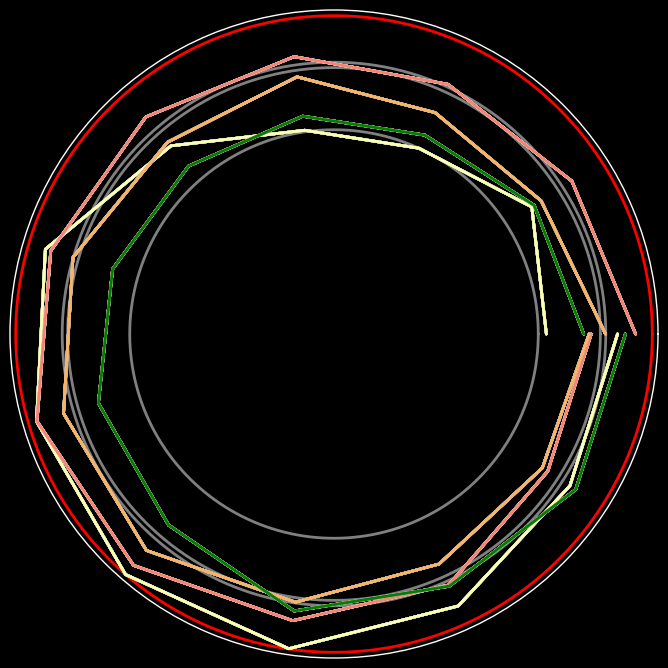

In [4502]:

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
ax1.set_facecolor((0, 0, 0))

theta = np.linspace(0, 2*np.pi, 12)

ax1.grid(False)
# ax1.set_axis_bgcolor("lightslategray")

full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [monthly['Close'].min()]*1000
red_line_one_radii = [monthly['Close'].mean()]*1000
red_line_median_radii = [monthly['Close'].median()]*1000
red_line_two_radii = [monthly['Close'].max()]*1000

ax1.plot(full_circle_thetas, blue_line_one_radii, c='gray')
ax1.plot(full_circle_thetas, red_line_one_radii, c='gray')
ax1.plot(full_circle_thetas, red_line_median_radii, c='gray')

ax1.plot(full_circle_thetas, red_line_two_radii, c='red')


years = monthly['year']
for index, year in enumerate(years):
    nums = monthly[monthly['year'] == year]['Close']
    r = nums
    ax1.plot(theta, r)

r = nums
ax1.plot(theta, r, c='green')







In [4503]:
merge = data.reset_index().copy()
merge = merge.set_index("Date")

idx = pd.date_range(merge.index.min(), merge.index.max().to_period('Y').to_timestamp('Y'))
df = merge.reindex(idx, method='ffill')
# df = df[df.index.weekday < 5]
df.index.name = 'Date'
df.tail(60)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-02,4920.000000,4955.100098,4882.399902,4905.200195,4905.200195,4597
2023-11-03,4901.149902,5288.799805,4901.149902,5192.799805,5192.799805,221713
2023-11-04,4901.149902,5288.799805,4901.149902,5192.799805,5192.799805,221713
2023-11-05,4901.149902,5288.799805,4901.149902,5192.799805,5192.799805,221713
2023-11-06,5220.000000,5394.799805,5220.000000,5242.899902,5242.899902,121788
2023-11-07,5250.000000,5440.000000,5245.000000,5353.450195,5353.450195,42613
2023-11-08,5355.000000,5538.000000,5355.000000,5408.850098,5408.850098,53598
2023-11-09,5430.000000,5521.950195,5351.649902,5383.250000,5383.250000,23910
2023-11-10,5420.750000,5514.500000,5403.250000,5433.700195,5433.700195,21221


In [4504]:
daily = df.copy()
daily.reset_index(inplace=True)

daily['year'] = daily['Date'].dt.year
daily['month'] = daily['Date'].dt.month
daily['day'] = daily['Date'].dt.day

daily.tail(40)


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
1421,2023-11-22,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,22
1422,2023-11-23,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,23
1423,2023-11-24,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,24
1424,2023-11-25,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,25
1425,2023-11-26,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,26
1426,2023-11-27,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,27
1427,2023-11-28,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,28
1428,2023-11-29,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,29
1429,2023-11-30,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,11,30
1430,2023-12-01,5420.75,5514.5,5403.25,5433.700195,5433.700195,21221,2023,12,1


In [4505]:
# merge = daily.reset_index().copy()
# merge = merge.set_index("Date")

# idx = pd.date_range(merge.index.min(), merge.index.max().to_period('Y').to_timestamp('Y'))
# df = merge.reindex(idx, method='ffill')
# # df = df[df.index.weekday < 5]
# df.tail(60)

merge = daily.copy()
merge = merge.set_index('Date')

idx = pd.date_range(merge.index.min(), merge.index.max().to_period('Y').to_timestamp('Y'))
df = merge.reindex(idx, method='ffill')

df.tail(100)


,Open,High,Low,Close,Adj Close,Volume,year,month,day
2023-09-23,5280.000000,5445.000000,5248.899902,5394.100098,5394.100098,29769,2023,9,23
2023-09-24,5280.000000,5445.000000,5248.899902,5394.100098,5394.100098,29769,2023,9,24
2023-09-25,5421.049805,5421.049805,5296.100098,5374.100098,5374.100098,11566,2023,9,25
2023-09-26,5374.100098,5390.950195,5182.100098,5260.799805,5260.799805,30333,2023,9,26
2023-09-27,5260.000000,5300.000000,5202.149902,5277.500000,5277.500000,7954,2023,9,27
...,...,...,...,...,...,...,...,...,...
2023-12-27,5420.750000,5514.500000,5403.250000,5433.700195,5433.700195,21221,2023,12,27
2023-12-28,5420.750000,5514.500000,5403.250000,5433.700195,5433.700195,21221,2023,12,28
2023-12-29,5420.750000,5514.500000,5403.250000,5433.700195,5433.700195,21221,2023,12,29
2023-12-30,5420.750000,5514.500000,5403.250000,5433.700195,5433.700195,21221,2023,12,30


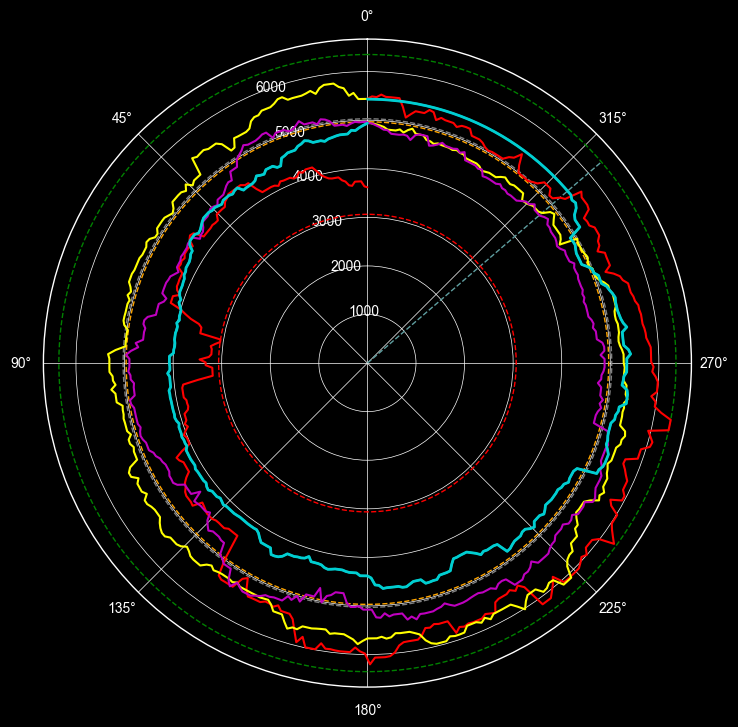

In [4506]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

plt.style.use('dark_background')


# ax1.set_ylim(daily['Close'].min() * 0.5, daily['Close'].max() * 1.1)
# ax1.set_yticks(np.arange(0, daily['Close'].max(), ))
# ax1.set_rlim(daily['Close'].min(), daily['Close'].max())


full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
min_c = [daily['Close'].min()]*1000
mean_c = [daily['Close'].mean()]*1000
median_c = [daily['Close'].median()]*1000
max_c = [daily['Close'].max()]*1000

ax1.plot(full_circle_thetas, min_c, c='red', linestyle='dashed', linewidth=1)
ax1.plot(full_circle_thetas, mean_c, c='ORANGE', linestyle='dashed', linewidth=1)
ax1.plot(full_circle_thetas, median_c, c='gray', linestyle='dashed', linewidth=1)

ax1.plot(full_circle_thetas, max_c, c='green', linestyle='dashed', linewidth=1)

ax1.set_theta_zero_location("N")
# ax1.set_ylim(daily['Close'].min() * 0.75, daily['Close'].max() * 1.1)



date = np.datetime64('today', 'D')
angle_fact = pd.to_datetime(date).dayofyear / 365

line = 2 * np.pi * angle_fact
line_y = daily['Close'].max() * 1
ax1.vlines(line, 0, line_y, zorder=1, colors='cadetblue', linestyles='dashed', linewidth=1)


bar_colors     = ['#333333', '#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AA0000']
colors = [
        'red', 'yellow', 'm', 'c', 'aqua', 'w',
          'r', 'y', 'm', 'c', 'w', 'w',
          'r', 'y', 'm', 'c', 'w', 'w']
years = daily['year'].unique()
for index, year in enumerate(years):
    length = daily[daily['year'] == year].shape[0]
    theta = np.linspace(0, 2 * np.pi, length)

    nums = daily[daily['year'] == year]['Close']
    r = nums
    ax1.plot(theta, r, c=colors[index], linewidth=1.5)

r = nums
ax1.plot(theta, r, c='darkturquoise', linewidth=2)




In [4507]:
date = np.datetime64('2023-10-01')
# date = np.datetime64('today', 'D') 

# # data.index[data['Date'] == date]
# loc = daily.get_loc(date)
idx = daily.loc[daily['Date'] == date]
idx = idx.index.item()

# idx / daily.shape[0]
# idx / 225
# idx
# daily.shape[0]

pd.to_datetime(date).dayofyear / 365
# date

# daily

0.7506849315068493

In [4508]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

/var/folders/d_/fm05t8855rn9qnv78rdwvccr0000gn/T/ipykernel_76851/40068513.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


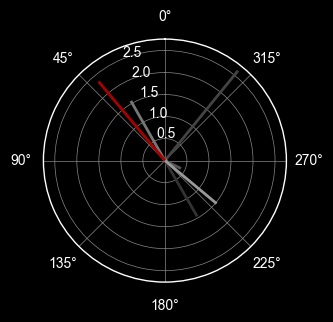

In [4509]:
bar_colors     = ['#333333', '#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AA0000']
num_obs        = len(bar_colors)

# Make up some data
wind_direction = (2*3.14)*(np.random.random_sample(num_obs))
wind_speed = 5 * np.random.random_sample(num_obs)
wind = zip(wind_direction, wind_speed, bar_colors) # polar(theta,r)

# Polar plotting
fig = plt.figure(figsize=(3, 3))  # Size
ax = plt.subplot(111, polar=True)  # Create subplot
plt.grid(color='#888888')  # Color the grid
ax.set_theta_zero_location('N')  # Set zero to North

ax.vlines(wind_direction, 0, wind_speed, colors=bar_colors, zorder=3)



fig.show()

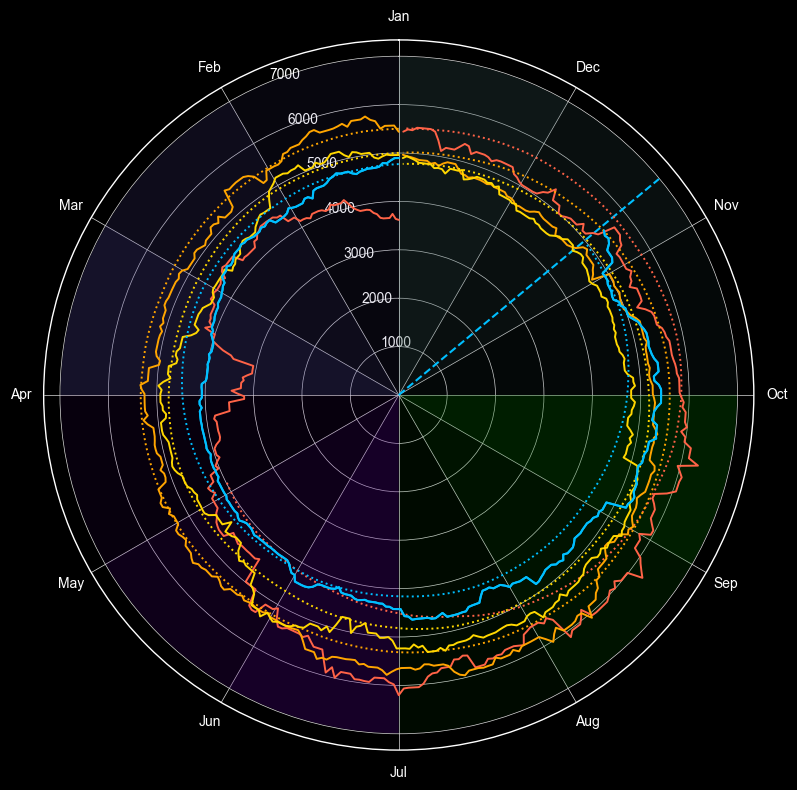

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq='D')

In [4510]:
merge = data.copy()


idx = pd.date_range(merge.index.min().replace(month=1, day=1), merge.index.max().to_period('Y').to_timestamp('Y'))
df = merge.reindex(idx, method='BFILL')

df.index.name = 'Date'
# df.tail(100)

month_new = df.copy()


month_new.drop(month_new.iloc[:,0:3], axis = 1, inplace = True)
month_new.drop(month_new.iloc[:,1:3], axis = 1, inplace = True)

# monthly = monthly.resample('M').mean()

month_new = month_new.reset_index()
month_new['year'] = month_new['Date'].dt.year
month_new['month'] = month_new['Date'].dt.month
month_new['day'] = month_new['Date'].dt.day_of_year
month_new['quarter'] = month_new['Date'].dt.quarter
month_new['ma'] = month_new['Close'].rolling(120).mean()
month_new['cma30'] = month_new['Close'].expanding().mean()



months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", '']
# month_colors = {
#     'Jan': 'darkslateblue',
#     'Feb': 'darkslateblue',
#     'Mar': 'darkslateblue',
#     'Apr': 'cornflowerblue',
#     'May': 'cornflowerblue',
#     'Jun': 'cornflowerblue',
#     'Jul': 'royalblue',
#     'Aug': 'royalblue',
#     'Sep': 'royalblue',
#     'Oct': 'slateblue',
#     'Nov': 'slateblue',
#     'Dec': 'slateblue',
# }

month_colors = {
    'Jan': 'darkslateblue',
    'Feb': 'darkslateblue',
    'Mar': 'darkslateblue',
    'Apr': 'indigo',
    'May': 'indigo',
    'Jun': 'indigo',
    'Jul': 'darkgreen',
    'Aug': 'darkgreen',
    'Sep': 'darkgreen',
    'Oct': 'darkslategray',
    'Nov': 'darkslategray',
    'Dec': 'darkslategray',
}



# Polar plotting
fig = plt.figure(figsize=(8, 8))  # Size
ax = plt.subplot(111, polar=True)  # Create subplot
plt.grid(color='#dddddd', zorder=5)  # Color the grid
ax.set_theta_zero_location('N')  # Set zero to North



for index, month in enumerate(months):
    if not month == '':
        ax.bar(np.deg2rad((index + 1) * 30 - 15), month_new['Close'].max() * 1.1, color=month_colors[month], alpha=((index % 3) + 1 ) * 0.1, width=np.pi/6)



#add months ring
months_angles= np.linspace(0, np.pi * 2, 13)
# for i,month in enumerate(months):
#   ax.text(months_angles[i], month_new['Close'].max() * 1.2,month,color="white",fontsize=15,ha="center")


ax.set_xticks(months_angles)
ax.set_xticklabels(months)

# ax.set_yscale('log')


days_this_year = month_new[month_new['year'] == 2023].shape[0]
date = np.datetime64('today', 'D')
angle_fact = (pd.to_datetime(date).dayofyear - 1) / days_this_year

line = 2 * np.pi * angle_fact
line_y = month_new['Close'].max() * 1.1
ax.vlines(line, 0, line_y, zorder=1, colors='deepskyblue', linestyles='dashed', linewidth=1.5)



colors = [
        'lavender', 'dodgerblue', 'gold', 'orange', 'aqua', 'w',
          'r', 'y', 'm', 'c', 'w', 'w',
          'r', 'y', 'm', 'c', 'w', 'w']


colors = [
        'tomato', 'orange', 'gold',  'deepskyblue', 'w',
          'r', 'y', 'm', 'c', 'w', 'w',
          'r', 'y', 'm', 'c', 'w', 'w']

colors = [
    'deepskyblue',
    'gold',  
    'orange', 
    'tomato', 
]



duration = 'year'
items = month_new[duration].unique()
length = len(items)

for index, term in enumerate(items):
    # theta = list(map(lambda x: 2 * np.pi * (((x)) / 365), month_new['day']))
    # closing = month_new['Close'].tolist()

    nums = month_new[month_new[duration] == term]['Close'].tolist()
    days = month_new[month_new[duration] == term]['day'].tolist()
    theta = list(map(lambda x: 2 * np.pi * (x / len(days)), np.arange(0, len(days), 1)))

    ax.plot(theta, nums, c=colors[length - index - 1], linewidth=1.4)


    ma = month_new[month_new[duration] == term]['ma'].tolist()
    days = month_new[month_new[duration] == term]['day'].tolist()
    theta = list(map(lambda x: 2 * np.pi * (x / len(days)), np.arange(0, len(days), 1)))

    ax.plot(theta, ma, ':', c=colors[length - index - 1], linewidth=1.4)

    # ma = month_new[month_new[duration] == term]['ma'].tolist()
    # days = month_new[month_new[duration] == term]['day'].tolist()
    # theta = list(map(lambda x: 2 * np.pi * (x / len(days)), np.arange(0, len(days), 1)))

    # ax.plot(theta, ma, '--', c=colors[index], linewidth=1)


ax.plot(theta, nums, c='deepskyblue', linewidth=1.5)
# ax.plot(theta, ma, ':', c="deepskyblue", linewidth=1.4)



# years = month_new['year'].unique()

# for year in years:
#     # theta = list(map(lambda x: 2 * np.pi * (((x)) / 365), month_new['day']))
#     # closing = month_new['Close'].tolist()

#     nums = month_new[month_new['year'] == year]['Close'].tolist()
#     days = month_new[month_new['year'] == year]['day'].tolist()
#     theta = list(map(lambda x: 2 * np.pi * (x / len(days)), np.arange(0, len(days), 1)))

#     print(len(days))

#     ax.plot(theta, nums, c='r', linewidth=1.5)

# ax.plot(theta, nums, c='darkturquoise', linewidth=2)

# date = np.datetime64('today', 'D')
# angle_fact = pd.to_datetime(date).dayofyear / 365




plt.tight_layout()
plt.show()

days_this_year
idx
# month_new.head(10)
# theta